# Homework set 3

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 20, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Loes Bijman 15211312

Sacha Gijsbers 12798525

Run the following cell to import NumPy and Pyplot.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

# Exercise 1

In this exercise you will study the accuracy of several methods for computing the QR decomposition. You are asked to implement these methods yourself. (However, when testing your implementation you may compare with an external implementation.)


## (a) 
Implement the classical and modified Gram-Schmidt procedures for computing the QR decomposition.

Include a short documentation using triple quotes: describe at least the input and the output, and whether the code modifies the input matrix.


In [16]:
def classical_gram_schmidt(A):
    '''
    Input: matrix A (mxn) as numpy array
    Output: matrices Q (mxn), R(nxn), derived by Gram-Schmidt procedures for QR decomposition: 
    Q orthogonal matrix and R upper triangular. 
    Input matrix A is not modified in the process.
    '''
    n_rows,n_columns = A.shape
    Q = np.zeros((n_rows,n_columns))
    R = np.zeros((n_columns,n_columns))

    for k in range(n_columns):
        Q[:,k] = A[:,k]

        for j in range(0,k):
            # create new column k in Q orthogonal to A[:,k]
            r_jk = np.dot(A[:,k],Q[:,j])
            Q[:,k] -= r_jk*Q[:,j]
            R[j,k] = r_jk

        # check for if columns are linearly dependent
        if np.linalg.norm(Q[:,k]) == 0:
            # note: this check only checks if ||Q[:,k]|| is equal to the integer zero, does not work for floats very close to zero
            # a solution would be to set abs(||Q[:,k]||)< c, but it is hard to determine c in such a way that it works
            raise ValueError('Rkk = 0')
        else:
            Q[:,k] = list(Q[:,k]/np.linalg.norm(Q[:,k]))
            R[k,k] = np.dot(A[:,k],Q[:,k])

    return Q, R, A

def modified_gram_schmidt(A):
    '''
    Input: matrix A (mxn) as numpy array
    Output: matrices Q (mxn), R(nxn), derived by QR decomposition with modified Gramm-Schmidt:
    Q orthogonal matrix and R upper triangular
    Matrix A is modified in the process.
    '''
    Q = A.astype(float)
    A = A.astype(float)
    _,n = A.shape
    R = np.zeros((n,n))

    for k in range(n):
        rkk = np.linalg.norm(A[:,k], ord=2)
        R[k,k] = rkk
        if abs(rkk) <= 1e-16:
            raise ValueError('Rkk = 0')
        Q[:,k] = A[:,k]/rkk

        for j in range(k+1,n):
            rkj = np.inner(Q[:,k], A[:,j])
            R[k,j] = rkj
            A[:,j] -= rkj*Q[:,k]
    return Q, R, A

A = np.array([[1,1,0,1],[1,0,1,0],[0,1,1,1]]).T
Qc, Rc, Ac = classical_gram_schmidt(A)
Qm, Rm, Am = modified_gram_schmidt(A)

print(f'Input A: \n {A}')
print('Classical:')
print(f'Q: \n{Qc}')
print(f'R: \n {Rc}')
print(f'A: \n {Ac}')
print('--------------------------------------------')

print('Modified: ')
print(f'Q: \n {Qm}')
print(f'R: \n {Rm}')
print(f'A: \n {Am}')

Input A: 
 [[1 1 0]
 [1 0 1]
 [0 1 1]
 [1 0 1]]
Classical:
Q: 
[[ 0.57735027  0.51639778 -0.63245553]
 [ 0.57735027 -0.25819889  0.31622777]
 [ 0.          0.77459667  0.63245553]
 [ 0.57735027 -0.25819889  0.31622777]]
R: 
 [[1.73205081 0.57735027 1.15470054]
 [0.         1.29099445 0.25819889]
 [0.         0.         1.26491106]]
A: 
 [[1 1 0]
 [1 0 1]
 [0 1 1]
 [1 0 1]]
--------------------------------------------
Modified: 
Q: 
 [[ 0.57735027  0.51639778 -0.63245553]
 [ 0.57735027 -0.25819889  0.31622777]
 [ 0.          0.77459667  0.63245553]
 [ 0.57735027 -0.25819889  0.31622777]]
R: 
 [[1.73205081 0.57735027 1.15470054]
 [0.         1.29099445 0.25819889]
 [0.         0.         1.26491106]]
A: 
 [[ 1.          0.66666667 -0.8       ]
 [ 1.         -0.33333333  0.4       ]
 [ 0.          1.          0.8       ]
 [ 1.         -0.33333333  0.4       ]]


## (b) (a+b 3.5 pts)
Let $H$ be a Hilbert matrix of size $n$ (see Computer Problem 2.6). Study the quality of the QR decompositions obtained using the two methods of part (a), specifically the loss of orthogonality. In order to do so, plot the quantity $\| I - Q^T Q \|$ as a function of $n$ on a log scale. Vary $n$ from $2$ to $12$.



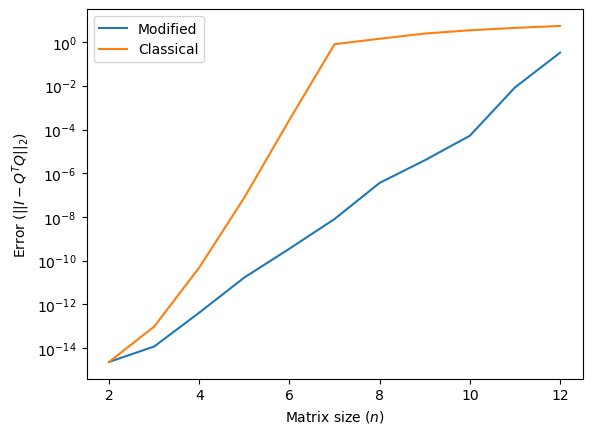

In [17]:
# keep track of the error for classical and modified Gram-Schmidt
error_class, error_mod = [], []

n_list = range(2,13)
for n in n_list:
    # create Hilbert matrix
    H = scipy.linalg.hilbert(n)

    Q_class = classical_gram_schmidt(H)[0]
    error_class.append(np.linalg.norm(np.identity(n) - np.matmul(Q_class.T,Q_class)))

    Q_mod = modified_gram_schmidt(H)[0]
    error_mod.append(np.linalg.norm(np.identity(n) - np.matmul(Q_mod.T,Q_mod)))

plt.plot(n_list,error_mod, label = 'Modified')
plt.plot(n_list,error_class, label = 'Classical')
plt.yscale('log')
plt.xlabel('Matrix size ($n$)')
plt.ylabel('Error ($||I - Q^TQ||_2$)')
plt.legend()
plt.show()


## (c) (1.5 pts)
Try applying the classical procedure twice. Plot again the loss of orthogonality when computing the QR decomposition of the Hilbert matrix of size $n$ as in (b).


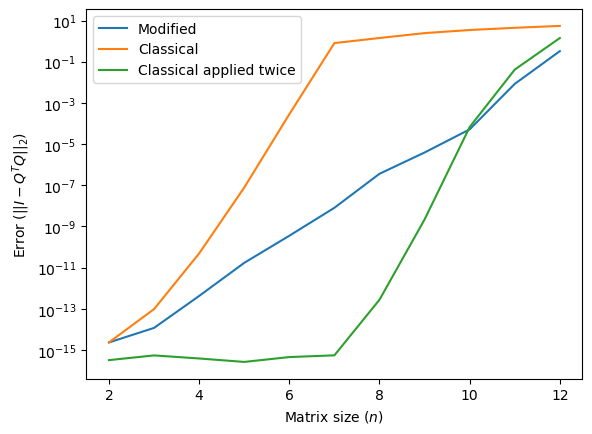

In [18]:
error_class_twice = []
n_list = range(2,13)
for n in n_list:
    H = scipy.linalg.hilbert(n)
    # apply the classical procedure twice
    Q_class_1 = classical_gram_schmidt(H)[0]
    Q_class = classical_gram_schmidt(Q_class_1)[0]
    error_class_twice.append(np.linalg.norm(np.identity(n) - np.matmul(Q_class.T,Q_class)))

plt.plot(n_list,error_mod, label = 'Modified')
plt.plot(n_list,error_class, label = 'Classical')
plt.plot(n_list,error_class_twice, label = 'Classical applied twice')
plt.yscale('log')
plt.xlabel('Matrix size ($n$)')
plt.ylabel('Error ($||I - Q^TQ||_2$)')
plt.legend()
plt.show()

## (d) (2 pts)
Implement the Householder method for computing the QR decomposition. Remember to include a short documentation.

In [19]:
def householder_QR(A):
    A = A.astype(float)
    n_rows,n_columns = A.shape
    Q = np.eye(n_rows)
    R = np.zeros((n_rows,n_columns))

    for k in range(n_columns):
        alpha_k = -np.sign(A[k,k]) * np.linalg.norm(A[k:n_rows,k])

        ek = np.zeros(n_rows)
        ek[k] = alpha_k

        ak = A[:,k].copy()
        ak[:k] = 0
        # vk = np.zeros(n_rows) 
        # vk[k:n_rows] = [A[i,k] for i in range(k,n_rows)]
        vk = ak - ek

        beta_k = np.inner(vk,vk)
        if beta_k != 0:
            for j in range(k,n_columns):
                gamma_j = np.inner(vk,A[:,j])
                A[:,j] -= (2*gamma_j/beta_k)*vk
            for j in range(0,n_columns):
                gamma_j = np.inner(vk,Q[:,j])
                Q[:,j] -= (2*gamma_j/beta_k)*vk
          
    R[:(n_rows - n_columns)] = A[:(n_rows - n_columns)]
    return Q,R

A = np.array([[1,0,0],[0,1,0],[0,0,1],[-1,1,0],[-1,0,1],[0,-1,1]])
# H = scipy.linalg.hilbert(n)
print(A)
Q, R = householder_QR(A)
print(Q)
print(R)


[[ 1  0  0]
 [ 0  1  0]
 [ 0  0  1]
 [-1  1  0]
 [-1  0  1]
 [ 0 -1  1]]
[[-0.57735027  0.          0.          0.          0.          0.        ]
 [-0.20412415 -0.61237244  0.          0.          0.          0.        ]
 [-0.35355339 -0.35355339 -0.70710678  0.          0.          0.        ]
 [ 0.51133922 -0.48783152 -0.0235077   1.          0.          0.        ]
 [ 0.48783152  0.0235077  -0.51133922  0.          1.          0.        ]
 [-0.0235077   0.51133922 -0.48783152  0.          0.          1.        ]]
[[-1.73205081  0.57735027  0.57735027]
 [ 0.         -1.63299316  0.81649658]
 [ 0.          0.         -1.41421356]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


## (e) (2 pts)
Perform the analysis of (b) for the Householder method. Discuss the differences between all the methods you have tested so far. Look online and/or in books for information about the accuracy of the different methods and include this in your explanations (with reference).


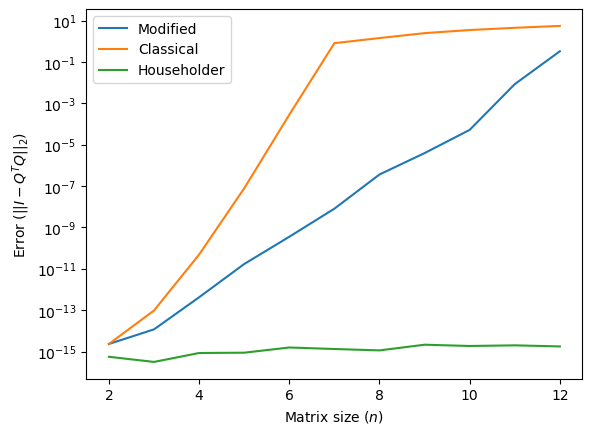

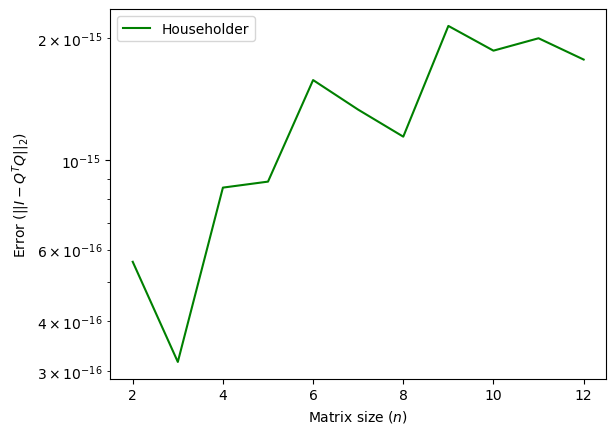

In [23]:
error_class, error_mod, error_house = [], [], []

n_list = range(2,13)
for n in n_list:
    # create Hilbert matrix
    H = scipy.linalg.hilbert(n)

    Q_class = classical_gram_schmidt(H)[0]
    error_class.append(np.linalg.norm(np.identity(n) - np.matmul(Q_class.T,Q_class)))

    Q_mod = modified_gram_schmidt(H)[0]
    error_mod.append(np.linalg.norm(np.identity(n) - np.matmul(Q_mod.T,Q_mod)))

    Q_house = householder_QR(H)[0]
    error_house.append(np.linalg.norm(np.identity(n) - np.matmul(Q_house.T,Q_house)))

plt.plot(n_list,error_mod, label = 'Modified')
plt.plot(n_list,error_class, label = 'Classical')
plt.plot(n_list,error_house, label = 'Householder')
plt.yscale('log')
plt.xlabel('Matrix size ($n$)')
plt.ylabel('Error ($||I - Q^TQ||_2$)')
plt.legend()
plt.show()

plt.plot(n_list,error_house, label = 'Householder', color = 'green')
plt.yscale('log')
plt.xlabel('Matrix size ($n$)')
plt.ylabel('Error ($||I - Q^TQ||_2$)')
plt.legend()
plt.show()